In [2]:
#importando os packages
import pandas as pd
import numpy as np
from arch.unitroot import ADF, DFGLS, PhillipsPerron, KPSS #Raiz Unitaria
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.api import VAR
import os
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
os.chdir(r"C:\Users\mathe\Documents\Projeto de Pesquisa\Testes e Graficos\Dados em USD")

In [4]:
DF = pd.read_csv('close_amount.csv',index_col=0) # Lendo a base de dados.

In [5]:
close = DF[['close_bitcointrade_btc', 'close_bitcointrade_eth', 'close_bitcointrade_ltc',  'close_bitso_btc',
            'close_bitso_eth','close_bitso_ltc', 'close_brazillex_btc','close_brazillex_eth', 
            'close_brazillex_ltc', 'close_cryptomarket_btc_clp','close_cryptomarket_ETHCLP', 'close_buda_btc_clp', 
            'close_buda_eth-clp','close_buda_ltc-clp','close_mercado_btc', 'close_mercado_ltc',]]

In [6]:
amount = DF[['amount_bitcointrade_btc','amount_bitcointrade_eth','amount_bitcointrade_ltc','amount_bitso_btc',
             'amount_bitso_eth','amount_bitso_ltc','amount_brazillex_btc','amount_brazillex_eth',
             'amount_brazillex_ltc','amount_cryptomarket_btc_clp','amount_cryptomarket_ETHCLP','amount_buda_btc_clp',
             'amount_buda_eth-clp','amount_buda_ltc-clp','amount_mercado_btc','amount_mercado_ltc']]

In [7]:
close_btc = close[['close_bitcointrade_btc','close_bitso_btc','close_brazillex_btc','close_cryptomarket_btc_clp'
                  ,'close_buda_btc_clp','close_mercado_btc']]

close_eth = close[['close_bitcointrade_eth','close_bitso_eth','close_brazillex_eth','close_cryptomarket_ETHCLP'
                  ]]

close_ltc = close[['close_bitcointrade_ltc','close_bitso_ltc','close_brazillex_ltc','close_buda_ltc-clp','close_mercado_ltc']]



amount_btc = amount[['amount_bitcointrade_btc','amount_bitso_btc','amount_brazillex_btc','amount_cryptomarket_btc_clp'
                  ,'amount_buda_btc_clp','amount_mercado_btc']]

amount_eth = amount[['amount_bitcointrade_eth','amount_bitso_eth','amount_brazillex_eth','amount_cryptomarket_ETHCLP'
                  ]]
amount_ltc = amount[['amount_bitcointrade_ltc','amount_bitso_ltc','amount_brazillex_ltc','amount_buda_ltc-clp','amount_mercado_ltc']]


In [68]:
log_close = np.log(close) # criando variavel log preço

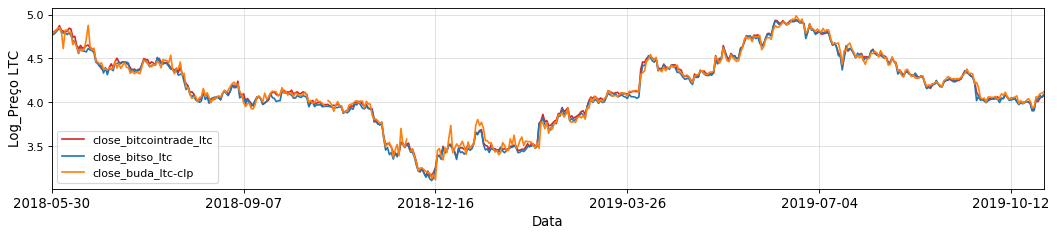

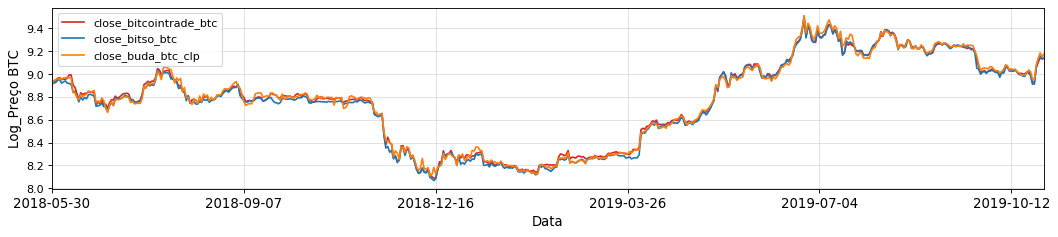

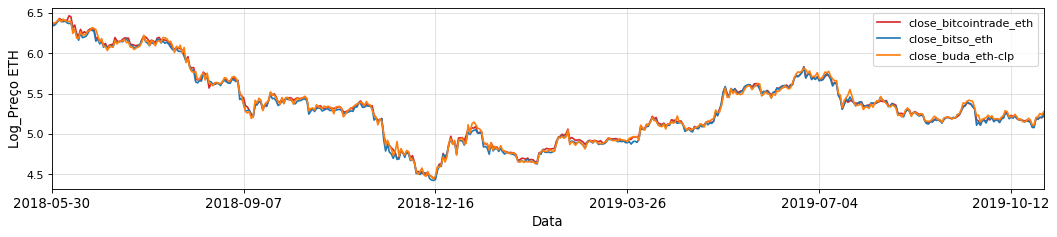

In [282]:
# plotando os graficos.
#plot 1  ltc 
x = close.index
fig, ax1 = plt.subplots(1,1,figsize=(16,3), dpi= 80)
log_close['close_bitcointrade_ltc'].plot(color='tab:red')
log_close['close_bitso_ltc'].plot()
log_close['close_buda_ltc-clp'].plot()
plt.legend()

#plot 2  btc 
fig2, ax2 = plt.subplots(1,1,figsize=(16,3), dpi= 80)
log_close['close_bitcointrade_btc'].plot(color='tab:red')
log_close['close_bitso_btc'].plot()
log_close['close_buda_btc_clp'].plot()
plt.legend()

#plot 3  eth 
fig3, ax3 = plt.subplots(1,1,figsize=(16,3), dpi= 80)
log_close['close_bitcointrade_eth'].plot(color='tab:red')
log_close['close_bitso_eth'].plot()
log_close['close_buda_eth-clp'].plot()
plt.legend()


# Decorations

ax1.set_xlabel('Data', fontsize=12)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Log_Preço LTC', color='black', fontsize=12)
ax1.tick_params(axis='y', rotation=0, labelcolor='black' )
ax1.grid(alpha=.4)

ax2.set_xlabel('Data', fontsize=12)
ax2.tick_params(axis='x', rotation=0, labelsize=12)
ax2.set_ylabel('Log_Preço BTC', color='black', fontsize=12)
ax2.tick_params(axis='y', rotation=0, labelcolor='black' )
ax2.grid(alpha=.4)



ax3.set_xlabel('Data', fontsize=12)
ax3.tick_params(axis='x', rotation=0, labelsize=12)
ax3.set_ylabel('Log_Preço ETH', color='black', fontsize=12)
ax3.tick_params(axis='y', rotation=0, labelcolor='black' )
ax3.grid(alpha=.4)

In [400]:
#fazendo o teste de argumented dicker-fuller e kpss
#primeiro nível sem trend   
adfs_primeiro_nivel  = []
kpss_primeiro_nivel = []
for i in log_close:
    dados = log_close[i].dropna()
    adf = ADF(dados, trend = 'nc')
    kp  = KPSS(dados, trend = 'c')
    adfs_primeiro_nivel.append(adf)
    kpss_primeiro_nivel.append(kp)
    

In [415]:
for i in range(16):
    if adfs_primeiro_nivel[i].pvalue >= 0.10 and kpss_primeiro_nivel[i].pvalue <= 0.05:
        print('ADF não rejeita hipotese nula a 10% e 5%','KPSS rejeita hipotese nula a 5%')
    elif adfs_primeiro_nivel[i].pvalue >= 0.05 and  adfs_primeiro_nivel[i].pvalue <= 0.10:
        print('não rejeita a hipotese nula a 5% mas rejeita a 10%')

ADF não rejeita hipotese nula a 10% e 5% KPSS rejeita hipotese nula a 5%
ADF não rejeita hipotese nula a 10% e 5% KPSS rejeita hipotese nula a 5%
ADF não rejeita hipotese nula a 10% e 5% KPSS rejeita hipotese nula a 5%
ADF não rejeita hipotese nula a 10% e 5% KPSS rejeita hipotese nula a 5%
ADF não rejeita hipotese nula a 10% e 5% KPSS rejeita hipotese nula a 5%
ADF não rejeita hipotese nula a 10% e 5% KPSS rejeita hipotese nula a 5%
ADF não rejeita hipotese nula a 10% e 5% KPSS rejeita hipotese nula a 5%
ADF não rejeita hipotese nula a 10% e 5% KPSS rejeita hipotese nula a 5%
ADF não rejeita hipotese nula a 10% e 5% KPSS rejeita hipotese nula a 5%
ADF não rejeita hipotese nula a 10% e 5% KPSS rejeita hipotese nula a 5%
ADF não rejeita hipotese nula a 10% e 5% KPSS rejeita hipotese nula a 5%
ADF não rejeita hipotese nula a 10% e 5% KPSS rejeita hipotese nula a 5%
ADF não rejeita hipotese nula a 10% e 5% KPSS rejeita hipotese nula a 5%
ADF não rejeita hipotese nula a 10% e 5% KPSS rejei

In [382]:
#as regreçoes dos tests adf
regressoes_adf = []
for i in range(16):
    reg = adfs_primeiro_nivel[i].regression
    regressões_adf.append(reg)

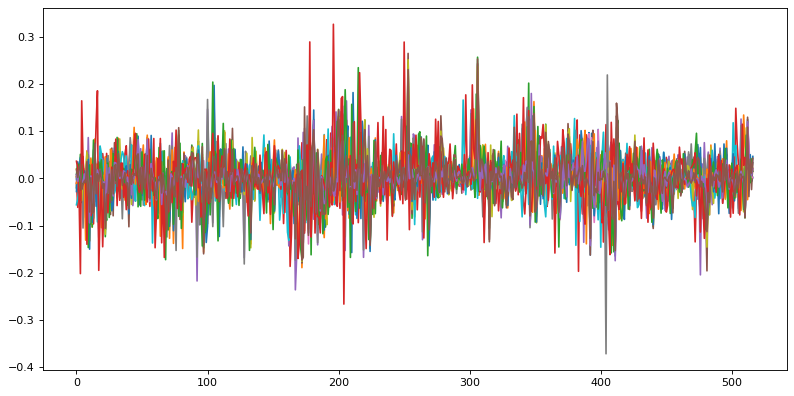

In [380]:
# uma olhada no residuos
fig, axes = plt.subplots(1,1,figsize=(12,6), dpi= 80)
#axes[0,1].plot(regressões_adf[1].resid)
for i in range(16):
    plt.plot(regressões_adf[i].resid)

In [406]:
#fazendo o teste de argumented dicker-fuller e kpss
#indicando claramente que as series de tempo são I(1)
# hnula de raiz unitaria foi rejeitado em todas as series de tempo na primeira diferença
adfs  = []
kpss = []
for i in close:
    print(i)
    diff = log_close[i].diff().dropna()
    adf = ADF(diff)
    kp  = KPSS(diff)
    adfs.append(adf)
    kpss.append(kp)

close_bitcointrade_btc
close_bitcointrade_eth
close_bitcointrade_ltc
close_bitso_btc
close_bitso_eth
close_bitso_ltc
close_brazillex_btc
close_brazillex_eth
close_brazillex_ltc
close_cryptomarket_btc_clp
close_cryptomarket_ETHCLP
close_buda_btc_clp
close_buda_eth-clp
close_buda_ltc-clp
close_mercado_btc
close_mercado_ltc


In [417]:
for i in range(16):
    if adfs[i].pvalue <= 0.05 and kpss[i].pvalue >= 0.10 :
        print('ADF rejeita hipotese nula a 5% e KPSS não rejeita hipotese nula')
    elif adfs[i].pvalue >= 0.05 and  adfs[i].pvalue <= 0.10:
        print('não rejeita a hipotese nula a 5% mas rejeita a 10%')

ADF rejeita hipotese nula a 5% e KPSS não rejeita hipotese nula
ADF rejeita hipotese nula a 5% e KPSS não rejeita hipotese nula
ADF rejeita hipotese nula a 5% e KPSS não rejeita hipotese nula
ADF rejeita hipotese nula a 5% e KPSS não rejeita hipotese nula
ADF rejeita hipotese nula a 5% e KPSS não rejeita hipotese nula
ADF rejeita hipotese nula a 5% e KPSS não rejeita hipotese nula
ADF rejeita hipotese nula a 5% e KPSS não rejeita hipotese nula
ADF rejeita hipotese nula a 5% e KPSS não rejeita hipotese nula
ADF rejeita hipotese nula a 5% e KPSS não rejeita hipotese nula
ADF rejeita hipotese nula a 5% e KPSS não rejeita hipotese nula
ADF rejeita hipotese nula a 5% e KPSS não rejeita hipotese nula
ADF rejeita hipotese nula a 5% e KPSS não rejeita hipotese nula
ADF rejeita hipotese nula a 5% e KPSS não rejeita hipotese nula
ADF rejeita hipotese nula a 5% e KPSS não rejeita hipotese nula
ADF rejeita hipotese nula a 5% e KPSS não rejeita hipotese nula


In [446]:
#Separando as informações dos testes para melhor orgazanização
# resultados dos testes em primeira diferença 
ADF_bitcointrade_diff = adfs[:3]
ADF_bitso_diff = adfs[3:6]
ADF_brazillex_diff = adfs[6:9]
ADF_crytomarket_diff = adfs[9:11]
ADF_buda_diff = adfs[11:14]
ADF_mercado_diff = adfs[14:]

KPSS_bitcointrade_diff = kpss[:3]
KPSS_bitso_diff = kpss[3:6]
KPSS_brazillex_diff = kpss[6:9]
KPSS_crytomarket_diff = kpss[9:11]
KPSS_buda_diff = kpss[11:14]
KPSS_mercado_diff = kpss[14:]


# resultados dos testes em primeiro nível

ADF_bitcointrade = adfs_primeiro_nivel[:3]
ADF_bitso = adfs_primeiro_nivel[3:6]
ADF_brazillex = adfs_primeiro_nivel[6:9]
ADF_crytomarket = adfs_primeiro_nivel[9:11]
ADF_buda = adfs_primeiro_nivel[11:14]
ADF_mercado = adfs_primeiro_nivel[14:]

KPSS_bitcointrade = kpss_primeiro_nivel[:3]
KPSS_bitso = kpss_primeiro_nivel[3:6]
KPSS_brazillex = kpss_primeiro_nivel[6:9]
KPSS_crytomarket = kpss_primeiro_nivel[9:11]
KPSS_buda = kpss_primeiro_nivel[11:14]
KPSS_mercado = kpss_primeiro_nivel[14:]

In [451]:
ADF_diff = [ADF_bitcointrade_diff, ADF_bitso_diff, ADF_brazillex_diff, 
            ADF_crytomarket_diff, ADF_buda_diff, ADF_mercado_diff]
KPSS_diff = [KPSS_bitcointrade_diff, KPSS_bitso_diff, KPSS_brazillex_diff, 
             KPSS_crytomarket_diff, KPSS_buda_diff, KPSS_mercado_diff]
ADF = [ADF_bitcointrade, ADF_bitso, ADF_brazillex, 
            ADF_crytomarket, ADF_buda, ADF_mercado]
KPSS = [KPSS_bitcointrade, KPSS_bitso, KPSS_brazillex, 
             KPSS_crytomarket, KPSS_buda, KPSS_mercado]

In [452]:
#criando arquivos txt com os resultados dos testes.
text_file_kpss_diff = open('Kpss_text_result_diff.txt','w')
text_file_adf_diff = open('ADF_test_result_diff.txt','w')
text_file_kpss = open('Kpss_text_result.txt','w')
text_file_adf = open('ADF_test_result.txt','w')

In [453]:
exchanges = ['bitcointrade','bitso','brazillex','cryptomarket','buda','mercado']
text_file_adf = open('ADF_test_result.txt','w')

for k in range(6):
        text_file_adf_diff.write("####################tests results primeira dif da corretora {} na ordem BTC, ETH(Se tiver) e LTC : {}##############".format(exchanges[k],ADF_diff[k]))
        text_file_kpss_diff.write("####################tests results primeira dif da corretora {} na ordem BTC, ETH(Se tiver) e LTC : {}##############".format(exchanges[k],KPSS_diff[k]))
        text_file_adf.write("####################tests results da corretora {} na ordem BTC, ETH(Se tiver) e LTC : {}##############".format(exchanges[k],ADF[k]))
        text_file_kpss.write("####################tests results da corretora {} na ordem BTC, ETH(Se tiver) e LTC : {}##############".format(exchanges[k],KPSS[k]))
        

In [454]:
#fechando e salvando os arquivos
text_file_kpss.close()
text_file_adf.close()
text_file_kpss_diff.close()
text_file_adf_diff.close()

In [219]:
#aumentando o número de lags
eth_brazillez= np.diff(log_close['close_brazillex_eth'])
kpss_eth_brazillex= KPSS(eth_brazillez,lags=5)

In [223]:
kpss[7] = kpss_eth_brazillex

In [255]:
data = log_close.diff().dropna()

In [256]:
var = VAR(data)

C:\Users\mathe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [257]:
results = var.fit()

In [260]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 21, Feb, 2020
Time:                     15:51:34
--------------------------------------------------------------------
No. of Equations:         16.0000    BIC:                   -123.390
Nobs:                     510.000    HQIC:                  -124.763
Log likelihood:           20733.9    FPE:                2.70191e-55
AIC:                     -125.649    Det(Omega_mle):     1.59891e-55
--------------------------------------------------------------------
Results for equation close_bitcointrade_btc
                                   coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------
const                                 0.000421         0.001527            0.276           0.783
L1.close_bitcointrade_btc            -0.097401         0.196491           -0

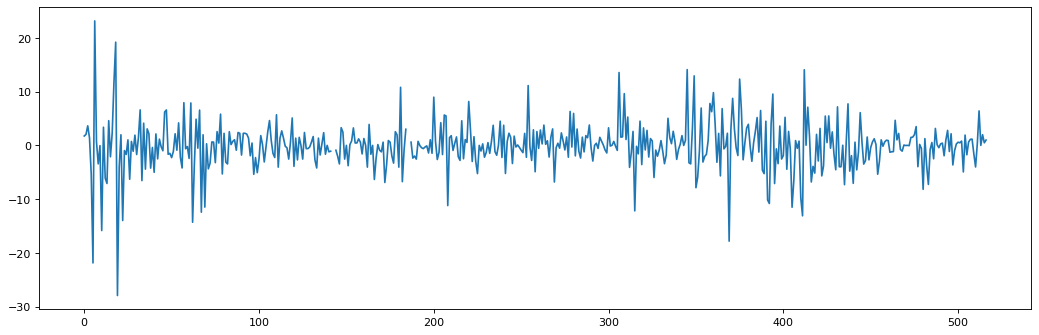

In [183]:
x = np.diff(close['close_buda_ltc-clp'])
fig, ax1 = plt.subplots(1,1,figsize=(16,5), dpi= 80)
ax1.plot(x)

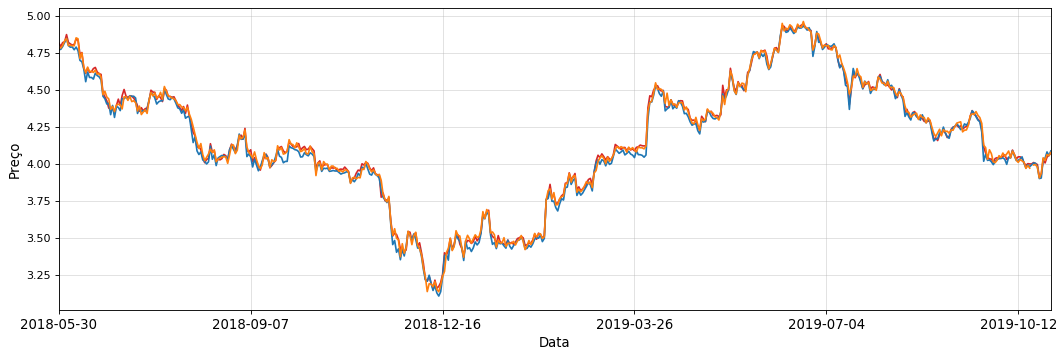

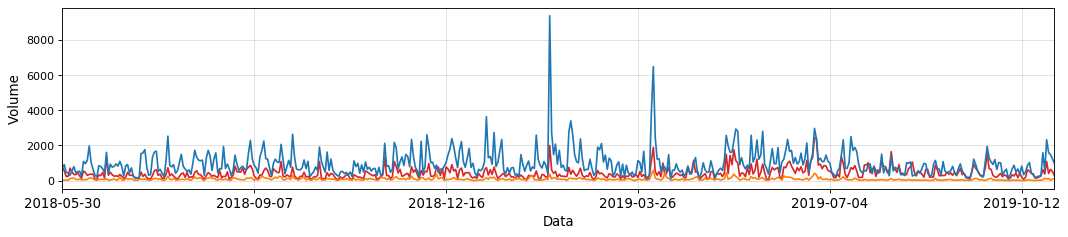

In [69]:
#plot 1 moedas
x = close.index
fig, ax1 = plt.subplots(1,1,figsize=(16,5), dpi= 80)
log_close['close_bitcointrade_ltc'].plot(color='tab:red')
log_close['close_bitso_ltc'].plot()
log_close['close_brazillex_ltc'].plot()
fig2, ax2 = plt.subplots(1,1,figsize=(16,3), dpi= 80)
amount['amount_bitcointrade_ltc'].plot(color='tab:red')
amount['amount_bitso_ltc'].plot()
amount['amount_brazillex_ltc'].plot()

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Data', fontsize=12)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Preço', color='black', fontsize=12)
ax1.tick_params(axis='y', rotation=0, labelcolor='black' )
ax1.grid(alpha=.4)

ax2.set_xlabel('Data', fontsize=12)
ax2.tick_params(axis='x', rotation=0, labelsize=12)
ax2.set_ylabel('Volume', color='black', fontsize=12)
ax2.tick_params(axis='y', rotation=0, labelcolor='black' )
ax2.grid(alpha=.4)

,close_bitcointrade_btc,close_bitcointrade_eth,close_bitcointrade_ltc,close_bitso_btc,close_bitso_eth,close_bitso_ltc,close_brazillex_btc,close_brazillex_eth,close_brazillex_ltc,close_cryptomarket_btc_clp,close_cryptomarket_ETHCLP,close_buda_btc_clp,close_buda_eth-clp,close_buda_ltc-clp,close_mercado_btc,close_mercado_ltc
2018-05-30,7606.605000,570.559815,123.561015,7414.553055,570.232533,118.232400,7598.547315,574.318815,119.487870,7542.40,579.200,7504.000000,569.044368,119.141008,7522.832997,118.958925
2018-05-31,7603.542230,580.468774,120.870000,7489.838996,568.026554,118.473004,7614.810000,579.104286,119.556546,7856.00,561.632,7659.721600,587.442560,120.886784,7587.673337,120.870000
2018-06-01,7600.414925,585.868500,124.028760,7533.031500,576.725000,120.810347,7628.247000,593.929838,121.687943,7712.00,580.000,7723.027872,587.422400,122.929584,7541.363103,120.893500
2018-06-02,7811.580000,599.955914,124.613300,7680.052243,596.734850,124.121250,7758.440000,595.168000,125.410400,7848.00,585.280,7827.761088,603.036640,126.571184,7665.445000,123.550532
2018-06-03,7854.889100,620.409500,130.883820,7713.954646,610.456893,127.497850,7910.938515,628.114800,127.536000,7893.44,609.856,7760.040000,616.253328,128.000000,7726.556008,127.004600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-25,8577.187509,179.034900,56.182500,8628.061715,181.583998,56.455606,8489.802497,177.287000,56.931600,8758.68,182.868,8819.707400,181.815200,58.100000,8514.770002,56.187789
2019-10-26,8985.541895,178.390674,54.983940,9185.484580,178.327902,56.762963,9114.050000,177.773915,55.932800,9105.88,177.800,9316.405000,184.344020,58.100000,8939.509702,53.971009
2019-10-27,9341.526700,182.329354,57.181300,9488.537533,182.891576,59.240177,9196.451000,179.784000,58.180100,9836.68,186.536,9758.000000,191.406600,60.088000,9139.020000,56.135057
2019-10-28,9283.382205,181.609995,57.915600,9233.849512,182.187573,57.755413,9231.175500,180.054390,57.767805,9530.92,187.544,9437.955800,187.962600,60.569600,9195.852573,56.675625
